In [148]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings
from joblib import dump, load
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from prettytable import PrettyTable
from sklearn.preprocessing import MinMaxScaler

# Models with BoW features

In [2]:
# load data
csvData = pd.read_csv('dataset/data.csv')

In [3]:
# load data_feature
data_feature = pd.read_csv('data_feature.csv')

In [4]:
# verify data
data_feature.head(2)

,job_description,processed_resume,match_percentage,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio_min,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college,cosine_similarity,euclidean_distance
0,machine learning engineering 13585abc knowledg...,liam andrew fresher executive work experience ...,13.60,87,192,13,0.180556,86,45,52,50,1,1,0.136678,13.416408
1,machine learning engineering 13585abc knowledg...,ellie mackey fresher intern executive profile ...,36.63,84,180,27,0.364865,86,47,57,52,1,0,0.316875,12.328828


In [5]:
# load bow_resume
with open('bow_resume.npy', 'rb') as f:
    bow_resume = np.load(f, allow_pickle=True)

In [6]:
# load bow_jd
with open('bow_jd.npy', 'rb') as f:
    bow_jd = np.load(f, allow_pickle=True)

In [7]:
# create output variable
y_bow = data_feature.match_percentage

In [8]:
# create input variables from extracted features
X_bow_1 = data_feature.drop(columns=['job_description', 'processed_resume', 'match_percentage'])

In [9]:
X_bow_1.head(3)

,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio_min,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college,cosine_similarity,euclidean_distance
0,87,192,13,0.180556,86,45,52,50,1,1,0.136678,13.416408
1,84,180,27,0.364865,86,47,57,52,1,0,0.316875,12.328828
2,93,184,18,0.260870,86,45,50,49,1,0,0.241508,12.845233


In [10]:
# create input variables from bow of job description
X_bow_2 = pd.DataFrame(bow_jd, columns=['bow_jd_'+str(i) for i in range(1, bow_jd.shape[1]+1)])

In [11]:
X_bow_2.head(3)

,bow_jd_1,bow_jd_2,bow_jd_3,bow_jd_4,bow_jd_5,bow_jd_6,bow_jd_7,bow_jd_8,bow_jd_9,bow_jd_10,...,bow_jd_707,bow_jd_708,bow_jd_709,bow_jd_710,bow_jd_711,bow_jd_712,bow_jd_713,bow_jd_714,bow_jd_715,bow_jd_716
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [12]:
# create input variables from bow of resumes
X_bow_3 = pd.DataFrame(bow_resume, columns=['bow_resume_'+str(i) for i in range(1, bow_resume.shape[1]+1)])

In [13]:
X_bow_3.head(3)

,bow_resume_1,bow_resume_2,bow_resume_3,bow_resume_4,bow_resume_5,bow_resume_6,bow_resume_7,bow_resume_8,bow_resume_9,bow_resume_10,...,bow_resume_707,bow_resume_708,bow_resume_709,bow_resume_710,bow_resume_711,bow_resume_712,bow_resume_713,bow_resume_714,bow_resume_715,bow_resume_716
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [14]:
# concat all three to create the original input
X_bow = pd.concat([X_bow_1, X_bow_2, X_bow_3], axis=1)

In [15]:
print(X_bow.shape)

(90, 1444)


In [16]:
X_bow.head(3)

,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio_min,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college,...,bow_resume_707,bow_resume_708,bow_resume_709,bow_resume_710,bow_resume_711,bow_resume_712,bow_resume_713,bow_resume_714,bow_resume_715,bow_resume_716
0,87,192,13,0.180556,86,45,52,50,1,1,...,0,1,0,1,0,0,0,0,0,0
1,84,180,27,0.364865,86,47,57,52,1,0,...,0,1,0,0,0,0,0,0,0,0
2,93,184,18,0.260870,86,45,50,49,1,0,...,0,1,1,0,0,0,0,0,0,0


In [134]:
# column names
features = X_bow.columns.to_numpy()

In [57]:
# # save features
# with open('features.npy', 'wb') as f:
#     np.save(f, features, allow_pickle=True)

<br><b style="color:#ff6600"><u>Summary</u></b><br>
* I have created the input and output data by combining extracted features and bow representations of resumes and job descriptions.
* We have 90 data points.
* We have 1444 features.

## Train Test split

In [18]:
y_bow = y_bow.to_numpy()
# do train test split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size=0.30, random_state=1)

In [19]:
# get train and test indices
train_indices = X_train_bow.index
test_indices = X_test_bow.index

In [21]:
print('Training data size 70% : '+str(len(X_train_bow)))
print('Test data size 30% : '+str(len(X_test_bow)))

Training data size 70% : 63
Test data size 30% : 27


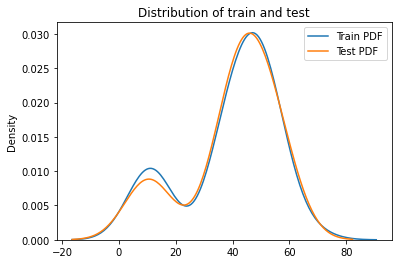

In [22]:
plt.title('Distribution of train and test')
sns.kdeplot(y_train_bow, label='Train PDF')
sns.kdeplot(y_test_bow, label='Test PDF')
plt.legend()
plt.show()

<br><b style="color:#ff6600"><u>Summary</u></b><br>
Outputs of both test and train data have same distribution.<br>
At first I had divided the data into train, cv and test data with 60%, 20% and 20% respectively in each group.<br>
But the model were not showing very different results when I changed the random state for the split.<br>
This is because we have a very small dataset.<br>
So I decided to use kfold cross validation for hyper parameter tuning. And I have divided the data as follows,<br>
* Train data is 70% and have 63 data points.
* Test data is 30% and have 27 data points.

## Preprocessing

In [23]:
# mean centering, variance scaling
scaler = StandardScaler()

In [24]:
# getting mean and variance
scaler.fit(X_train_bow)

StandardScaler()

In [25]:
# standardizing train data
X_train_bow = scaler.transform(X_train_bow)

In [26]:
# standardizing test data
X_test_bow = scaler.transform(X_test_bow)

<br><b style="color:#ff6600"><u>Summary</u></b><br>
In preprocessing I have done standardization which means mean centering and variance scaling. So now all column will have mean of 0 and variance of 1.

## Modeling (Basic)

In [28]:
def showErrors(model, X_train, y_train, X_test, y_test):
    '''show errors for train and test and also return test errors'''
    print('\n','==========','Train Errors','==========','\n')
    # predict for train
    y_train_pred = model.predict(X_train)
    # get mean squared error for train data
    print('MSE on train data =>',mse(y_train, y_train_pred))
    # get r squared score for train data
    print('R-squared on train data =>',r2_score(y_train, y_train_pred))
    # plot histogram 
    sns.histplot(y_train - y_train_pred)
    # set title and show plot
    plt.title('PDF of errors')
    plt.show()

    print('\n','==========','Test Errors','==========','\n')
    # predict for test
    y_test_pred = model.predict(X_test)
    # get mean squared error for test data
    print('MSE on test data =>',mse(y_test, y_test_pred))
    # get r squared score for test data
    print('R-squared on test data =>',r2_score(y_test, y_test_pred))
    # get errors
    test_errors = y_test - y_test_pred
    # plot histogram 
    sns.histplot(test_errors)
    # set title and show plot
    plt.title('PDF of errors')
    plt.show()
    return test_errors

### Linear Regression

In [28]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_bow):
        # split input data
        X_train, X_cv = X_train_bow[train_index], X_train_bow[cv_index]
        # split output data
        y_train, y_cv = y_train_bow[train_index], y_train_bow[cv_index]
        # create Linear Regression model with l2 regularizer
        model = Ridge(alpha = space['alpha'], max_iter=3000)
        # train the model
        model.fit(X_train, y_train)
        # predict output for cv
        cv_pred = model.predict(X_cv)
        # calculate cv loss
        tempmseloss = mse(y_cv, cv_pred)
        # save cv mse loss
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [29]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "alpha": hp.quniform("alpha", 0.001, 1000, 0.001)
}

In [32]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:15<00:00, 19.11trial/s, best loss: 174.83018200877768]


In [33]:
print("Best Param : ", best_param)

Best Param :  {'alpha': 0.109}


In [34]:
# create l2 linear regerssion model
lr_model = Ridge(alpha = 0.109, max_iter=3000)
# fit model on train data
lr_model.fit(X_train_bow, y_train_bow)

Ridge(alpha=0.109, max_iter=3000)


 ========== Train Errors ========== 

MSE on train data => 4.790370606591921e-06
R-squared on train data => 0.9999999817312473


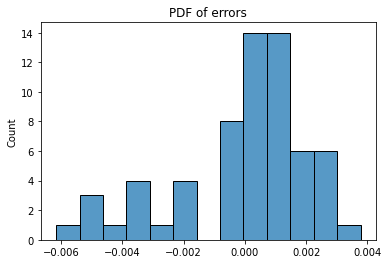


 ========== Test Errors ========== 

MSE on test data => 91.47776450960637
R-squared on test data => 0.6112817907676569


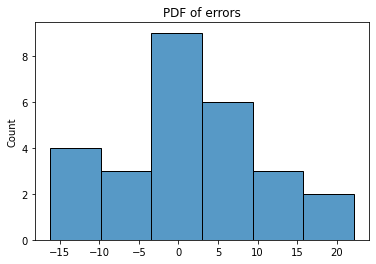

In [35]:
# get errors
test_errors = showErrors(lr_model, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

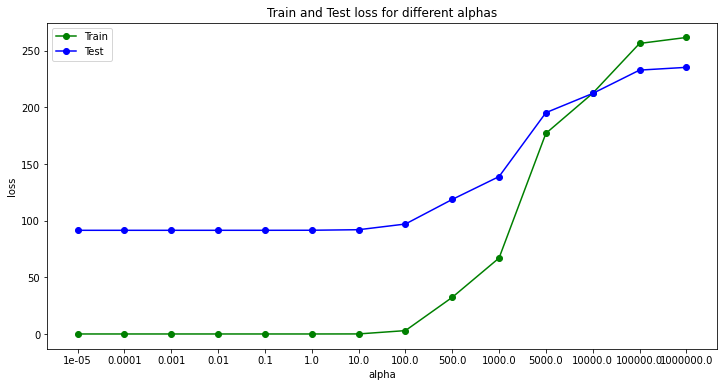

In [36]:
# regularisation params
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, .5e3, 1e3, .5e4, 1e4, 1e5, 1e6]

train_mse = []
cv_mse = []
# calculate train and cv loss for each alpha
for i in alphas:
    # create l2 linear regerssion model
    model = Ridge(alpha = i, max_iter=3000)
    # fit model on train data
    model.fit(X_train_bow, y_train_bow)
    # get train loss
    train_mse.append(mse(y_train_bow, model.predict(X_train_bow)))
    # get test loss
    cv_mse.append(mse(y_test_bow, model.predict(X_test_bow)))

# create x axis values
x_axis = list(range(len(alphas)))
# set fig size
plt.figure(figsize=(12, 6))
# title for the plot
plt.title('Train and Test loss for different alphas')
# plot a line plot for train mse
plt.plot(train_mse, 'o-', color='green', label='Train')
# plot a line plot for cv mse
plt.plot(cv_mse, 'o-', color='blue', label='Test')
# change x ticks
plt.xticks(ticks=x_axis, labels=alphas)
plt.xlabel('alpha')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
# get data points with mae greater than 15
csvData.loc[test_indices[np.abs(test_errors)>15]]

,CandidateID,Match Percentage
87,candidate_072,44.94
74,candidate_086,7.81
60,candidate_047,11.30
89,candidate_037,56.70


In [79]:
def getKFeatures(k, model, reverse=False):
    '''get top or bottom k number of important features for linear regression'''
    # get k features
    if reverse:
        top_k = np.argsort(np.abs(model.coef_))[:k]
    else:
        top_k = np.argsort(np.abs(model.coef_))[::-1][:k]
    top_k_features = list(features[top_k])
    # load bow vocab
    with open('bow_vocab.npy', 'rb') as f:
        bow_vocab = np.load(f, allow_pickle=True)
    values = np.array(model.coef_[top_k], dtype=np.float16)
    labels = ['BoW: '+bow_vocab[int(i.replace('bow_resume_',''))-1] if i.startswith('bow_resume_') else i for i in top_k_features]
    for i in range(k):
        print(labels[i].ljust(35, '-'), '> ', values[i])

In [39]:
getKFeatures(20, lr_model)

BoW: various----------------------- >  0.675
common_word_ratio_min-------------- >  0.645
cosine_similarity------------------ >  0.527
BoW: logistic---------------------- >  -0.4834
common_word_num-------------------- >  0.474
BoW: academic---------------------- >  -0.4673
BoW: intern------------------------ >  -0.4229
fuzz_partial_ratio----------------- >  0.4182
BoW: mysql------------------------- >  -0.4136
fuzz_token_sort_ratio-------------- >  0.4055
BoW: way--------------------------- >  -0.403
BoW: based------------------------- >  -0.4023
BoW: learning artificial----------- >  0.3792
BoW: skill data analysis----------- >  -0.3745
BoW: fresher----------------------- >  0.3733
BoW: amount------------------------ >  -0.3733
BoW: explore----------------------- >  0.3662
BoW: modeling predictive----------- >  -0.3542
BoW: powerbi----------------------- >  -0.3535
BoW: big data analytics------------ >  0.3403


### KNN Regression

In [40]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_bow):
        # split input data
        X_train, X_cv = X_train_bow[train_index], X_train_bow[cv_index]
        # split output data
        y_train, y_cv = y_train_bow[train_index], y_train_bow[cv_index]
        # create KNN Regression model
        model = KNeighborsRegressor(n_neighbors=space['n_neighbors'], metric=space['metric'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [41]:
# search space for hyper parameter tuning
space = {
    "n_neighbors": hp.choice("n_neighbors", [3, 5, 7]),
    "metric": hp.choice("metric", ['euclidean', 'cosine'])
}

In [42]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:05<00:00, 53.65trial/s, best loss: 206.95988415937805]


In [43]:
print(best_param)

{'metric': 1, 'n_neighbors': 2}


In [44]:
knn_model = KNeighborsRegressor(n_neighbors=7, metric='cosine')

In [45]:
knn_model.fit(X_train_bow, y_train_bow)

KNeighborsRegressor(metric='cosine', n_neighbors=7)


 ========== Train Errors ========== 

MSE on train data => 157.02100800129577
R-squared on train data => 0.40117827864275457


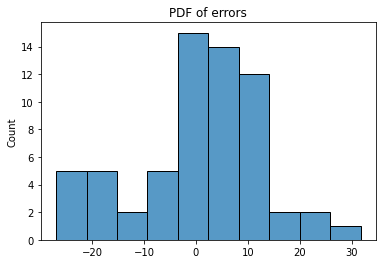


 ========== Test Errors ========== 

MSE on test data => 148.5021040060469
R-squared on test data => 0.36896717747837193


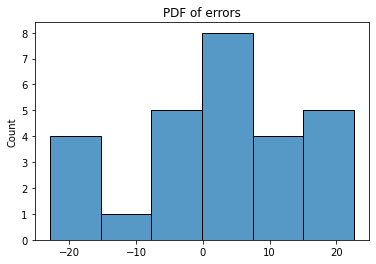

In [46]:
test_errors = showErrors(knn_model, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

<br><b style="color:#ff6600"><u>Summary</u></b><br>
Initially, I have tried only two models. One is Linear Regression with L2 regularizer which is a simple model. And the other is KNN Regression which is little bit of complex model.
<br><br>
After hyper-param tuning with hyperopt, I found the best alpha for the linear regression model is 0.109. But when we calculate the MSE errors we found that there is huge gap in train and test mse errors. The mse on train data is 4.79 where as the mse on test data is 91.48.
<br><br>
So, I plotted the test and train mse loss for different alpha values. From the plot we can see that the model is overfitting. The difference between train and test mse decreases for higher alpha values. But in that case the both mse loss will increase significantly. 
<br><br>
Since Linear regression is a simple and high bias model we should not see such overfitting. I had also tried linear regression with l1 regularizer and it was showing very similar result.
<br><br>
Similarly for KNN regression I found the best params (n_neighbors=7, metric='cosine'). But the KNN is performing very badly on both train and test data. The mse on train is 157.02 and test is 148.5.
<br><br>
So I chose the Linear regression model with l2 regularizer for error analysis.

## Error Analysis

In [ ]:
feature_selector = LinearRegression()
sfs = SequentialFeatureSelector(feature_selector, n_features_to_select=100, direction='forward', cv=3)
sfs.fit(StandardScaler().fit_transform(X_bow), y_bow)

In [ ]:
# # save selected_features
# features = sfs.get_support()
# with open('selected_features.npy', 'wb') as f:
#     np.save(f, features, allow_pickle=True)

In [20]:
with open('selected_features.npy', 'rb') as f:
    features = np.load(f)

In [48]:
features

array(['common_word_ratio_min', 'fuzz_ratio', 'fuzz_token_sort_ratio',
       'bow_jd_1', 'bow_jd_2', 'bow_jd_3', 'bow_jd_4', 'bow_jd_5',
       'bow_jd_6', 'bow_jd_7', 'bow_jd_8', 'bow_jd_9', 'bow_jd_10',
       'bow_jd_11', 'bow_jd_12', 'bow_jd_13', 'bow_jd_14', 'bow_jd_15',
       'bow_jd_16', 'bow_jd_17', 'bow_jd_18', 'bow_jd_19', 'bow_jd_20',
       'bow_jd_21', 'bow_jd_22', 'bow_jd_23', 'bow_jd_24', 'bow_jd_25',
       'bow_jd_26', 'bow_jd_27', 'bow_jd_28', 'bow_jd_29', 'bow_jd_30',
       'bow_jd_31', 'bow_jd_32', 'bow_jd_33', 'bow_jd_34', 'bow_jd_35',
       'bow_jd_36', 'bow_jd_37', 'bow_jd_38', 'bow_jd_39', 'bow_jd_40',
       'bow_jd_41', 'bow_jd_42', 'bow_jd_43', 'bow_jd_44', 'bow_resume_8',
       'bow_resume_16', 'bow_resume_33', 'bow_resume_54', 'bow_resume_55',
       'bow_resume_69', 'bow_resume_77', 'bow_resume_83', 'bow_resume_85',
       'bow_resume_106', 'bow_resume_107', 'bow_resume_108',
       'bow_resume_136', 'bow_resume_148', 'bow_resume_150',
       'bow_res

In [21]:
X_bow = X_bow[features]

<br><b style="color:#ff6600"><u>Summary</u></b><br>
For BoW, I had used minimum document frequency of 2, but the models were overfitting so I chosed min_df = 4. Which improved the result little bit but not much.
<br><br>
I checked the data points which showed higher errors and compared different resumes.
<br><br>
I also tried the linear regression model multiple times and checked the feature importance. It showed some traces of collinearity.
<br><br>
These collinearity or multi-collinearity could be because we do have short and long form of some skills and degrees. And also because we have unigram, bigram and trigram.
<br><br>
So I did forward feature selection with SequentialFeatureSelector to select 500 features. After that when I fitted a linear regression. And I found less than 100 weight were non zero. 
<br><br>
So again did forward feature selection to selection only top 100 features. So now we have reached from 1444 features to 100 features, that means we have only 6.93% of the original features.
<br><br>
When we view the selected features we see that we have some of the extracted features. Also we have more number of features or words from resume than the jd. That's because we have only one jd for the whole dataset.

## Train Test split

In [22]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, test_size=0.30, random_state=1)

In [23]:
# get train and test indices
train_indices = X_train_bow.index
test_indices = X_test_bow.index

<br><b style="color:#ff6600"><u>Summary</u></b><br>
Now again I have done train test split with the same random state. So the both the data will contain the same data point as earlier.

## Preprocessing

In [24]:
# mean centering, variance scaling
scaler = StandardScaler()

In [25]:
# getting mean and variance
scaler.fit(X_train_bow)

StandardScaler()

In [26]:
# standardizing train data
X_train_bow = scaler.transform(X_train_bow)

In [27]:
# standardizing test data
X_test_bow = scaler.transform(X_test_bow)

In [66]:
# # save all the data
# with open('X_train_bow.npy', 'wb') as f:
#     np.save(f, X_train_bow, allow_pickle=True)
# with open('X_test_bow.npy', 'wb') as f:
#     np.save(f, X_test_bow, allow_pickle=True)
# with open('y_train_bow.npy', 'wb') as f:
#     np.save(f, y_train_bow, allow_pickle=True)
# with open('y_test_bow.npy', 'wb') as f:
#     np.save(f, y_test_bow, allow_pickle=True)

<br><b style="color:#ff6600"><u>Summary</u></b><br>
I have done the mean centering and variance scaling. And also I have saved the data points.

## Modeling

### Linear Regression

In [40]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_bow):
        # split input data
        X_train, X_cv = X_train_bow[train_index], X_train_bow[cv_index]
        # split output data
        y_train, y_cv = y_train_bow[train_index], y_train_bow[cv_index]
        # create Linear Regression model with l2 regularizer
        model = Ridge(alpha = space['alpha'], max_iter=3000)
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [ ]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "alpha": hp.quniform("alpha", 0.001, 1000, 0.001)
}

In [62]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|████████| 300/300 [00:09<00:00, 31.70trial/s, best loss: 73.53628002861929]


In [63]:
print("Best Param : ", best_param)

Best Param :  {'alpha': 1.659}


In [41]:
# create l2 linear regerssion model
lr_model = Ridge(alpha = 1.659, max_iter=3000)
# fit model on train data
lr_model.fit(X_train_bow, y_train_bow)

Ridge(alpha=1.659, max_iter=3000)


 ========== Train Errors ========== 

MSE on train data => 1.9843832341166183
R-squared on train data => 0.9924322751508743


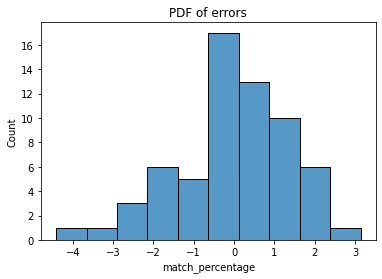


 ========== Test Errors ========== 

MSE on test data => 52.13855568706237
R-squared on test data => 0.7784466410249087


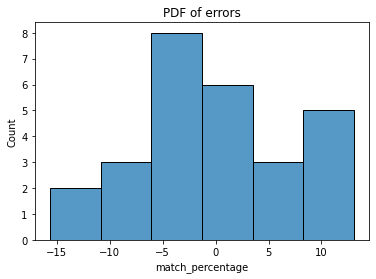

In [42]:
test_errors = showErrors(lr_model, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

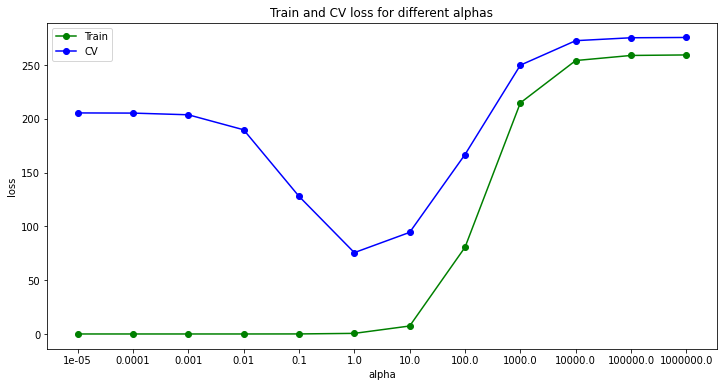

In [67]:
# regularisation params
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]

train_mse = []
cv_mse = []
# calculate train and cv loss for each alpha
for i in alphas:
    kf = KFold(n_splits=3)
    trainloss = 0
    cvloss = 0
    # k fold cross validation
    count = 0
    for train_index, cv_index in kf.split(X_train_bow):
        count += 1
        # split input data
        X_train, X_cv = X_train_bow[train_index], X_train_bow[cv_index]
        # split output data
        y_train, y_cv = y_train_bow[train_index], y_train_bow[cv_index]
        # create Linear Regression model with l2 regularizer
        model = Ridge(alpha = i, max_iter=3000)
        # train the model
        model.fit(X_train, y_train)
        trainloss += mse(y_train, model.predict(X_train))
        cvloss += mse(y_cv, model.predict(X_cv))
    
    train_mse.append(trainloss/count)
    cv_mse.append(cvloss/count)

# create x axis values
x_axis = list(range(len(alphas)))
# set fig size
plt.figure(figsize=(12, 6))
# title for the plot
plt.title('Train and CV loss for different alphas')
# plot a line plot for train mse
plt.plot(train_mse, 'o-', color='green', label='Train')
# plot a line plot for cv mse
plt.plot(cv_mse, 'o-', color='blue', label='CV')
# change x ticks
plt.xticks(ticks=x_axis, labels=alphas)
plt.xlabel('alpha')
plt.ylabel('loss')
plt.legend()
plt.show()

In [68]:
getKFeatures(20, lr_model)

common_word_ratio_min-------------- >  4.688
BoW: experienced------------------- >  -4.684
BoW: logistic---------------------- >  -4.285
BoW: various----------------------- >  3.99
fuzz_token_sort_ratio-------------- >  3.723
BoW: beng bachelor engineering----- >  -3.5
BoW: gathering--------------------- >  -3.387
BoW: logistic regression----------- >  -3.242
BoW: ai---------------------------- >  2.725
BoW: power bi---------------------- >  -2.574
BoW: tuning------------------------ >  -2.447
BoW: scientist--------------------- >  -2.248
BoW: panda matplotlib-------------- >  2.236
BoW: data visualization------------ >  2.229
BoW: recommender system------------ >  -2.203
BoW: html-------------------------- >  -2.123
BoW: developer--------------------- >  2.035
BoW: bsc bachelor science---------- >  -1.902
BoW: opportunity------------------- >  1.56
BoW: 2019 project------------------ >  -1.238


In [69]:
getKFeatures(5, lr_model, reverse=True)

bow_jd_32-------------------------- >  0.0
bow_jd_23-------------------------- >  0.0
bow_jd_24-------------------------- >  0.0
bow_jd_25-------------------------- >  0.0
bow_jd_26-------------------------- >  0.0


### KNN Regression

In [79]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_bow):
        # split input data
        X_train, X_cv = X_train_bow[train_index], X_train_bow[cv_index]
        # split output data
        y_train, y_cv = y_train_bow[train_index], y_train_bow[cv_index]
        # create KNN Regression model
        model = KNeighborsRegressor(n_neighbors=space['n_neighbors'], metric=space['metric'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [80]:
# search space for hyper parameter tuning
space = {
    "n_neighbors": hp.choice("n_neighbors", [3, 5, 7]),
    "metric": hp.choice("metric", ['euclidean', 'cosine'])
}

In [74]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:01<00:00, 203.79trial/s, best loss: 184.7906720764496]


In [75]:
print(best_param)

{'metric': 1, 'n_neighbors': 2}


In [76]:
knn_model = KNeighborsRegressor(n_neighbors=7, metric='cosine')

In [77]:
knn_model.fit(X_train_bow, y_train_bow)

KNeighborsRegressor(metric='cosine', n_neighbors=7)


 ========== Train Errors ========== 

MSE on train data => 130.74267460317458
R-squared on train data => 0.5013944028427257


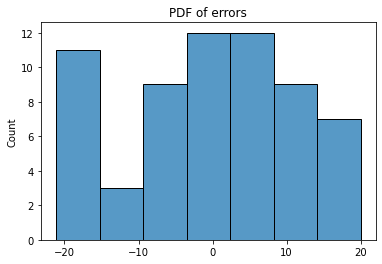


 ========== Test Errors ========== 

MSE on test data => 113.76603983371128
R-squared on test data => 0.5165717973904831


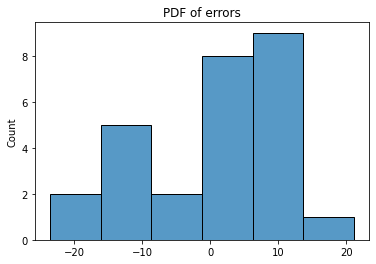

In [78]:
test_errors = showErrors(knn_model, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

### Decision Tree Regressor

In [81]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_bow):
        # split input data
        X_train, X_cv = X_train_bow[train_index], X_train_bow[cv_index]
        # split output data
        y_train, y_cv = y_train_bow[train_index], y_train_bow[cv_index]
        # create Decision Tree Regressor
        model = DecisionTreeRegressor(max_depth=space['max_depth'], min_samples_split=space['min_samples_split'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [82]:
# search space for hyper parameter tuning
space = {
    "max_depth": hp.choice("max_depth", [3, 5, 7, 10, 15, 20, None]),
    "min_samples_split": hp.choice("min_samples_split", [2, 3, 5, 7])
}

In [83]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|██████| 300/300 [00:01<00:00, 229.87trial/s, best loss: 290.10704201052795]


In [84]:
best_param

{'max_depth': 1, 'min_samples_split': 0}

In [85]:
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=2)

In [86]:
dt_model.fit(X_train_bow, y_train_bow)

DecisionTreeRegressor(max_depth=5)


 ========== Train Errors ========== 

MSE on train data => 21.960237271352984
R-squared on train data => 0.9162515433340193


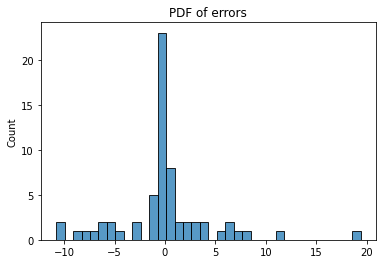


 ========== Test Errors ========== 

MSE on test data => 164.57625432804232
R-squared on test data => 0.3006629839774322


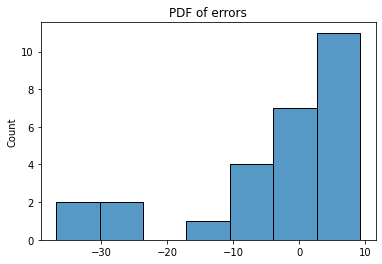

In [87]:
test_errors = showErrors(dt_model, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

### Support Vector Regression (RBF Kernel)

In [88]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_bow):
        # split input data
        X_train, X_cv = X_train_bow[train_index], X_train_bow[cv_index]
        # split output data
        y_train, y_cv = y_train_bow[train_index], y_train_bow[cv_index]
        # create SVR RBF
        model = SVR(C = space['c'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [89]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "c": hp.quniform("c", 0.001, 1000, 0.001)
}

In [90]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|██████| 300/300 [00:02<00:00, 115.34trial/s, best loss: 145.75406757580532]


In [91]:
print("Best Param : ", best_param)

Best Param :  {'c': 253.341}


In [92]:
svr_model_rbf = SVR(C = 253.341)

In [93]:
svr_model_rbf.fit(X_train_bow, y_train_bow)

SVR(C=253.341)


 ========== Train Errors ========== 

MSE on train data => 0.00998284437264078
R-squared on train data => 0.9999619290174776


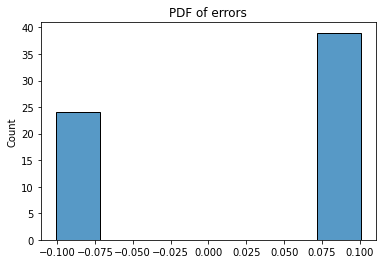


 ========== Test Errors ========== 

MSE on test data => 90.8420722191653
R-squared on test data => 0.6139830501402239


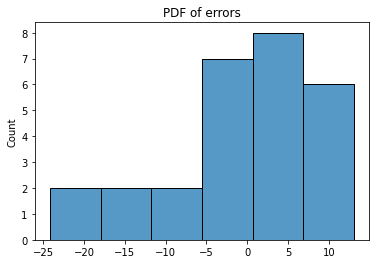

In [94]:
test_errors = showErrors(svr_model_rbf, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

### Support Vector Regression (Linear Kernel)

In [95]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_bow):
        # split input data
        X_train, X_cv = X_train_bow[train_index], X_train_bow[cv_index]
        # split output data
        y_train, y_cv = y_train_bow[train_index], y_train_bow[cv_index]
        # create SVR RBF
        model = SVR(kernel = 'linear', C = space['c'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [96]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "c": hp.quniform("c", 0.001, 1000, 0.001)
}

In [97]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|████████| 300/300 [00:05<00:00, 57.70trial/s, best loss: 77.23483636457564]


In [98]:
print("Best Param : ", best_param)

Best Param :  {'c': 1.429}


In [67]:
svr_model_linear = SVR(kernel = 'linear', C = 1.429)

In [68]:
svr_model_linear.fit(X_train_bow, y_train_bow)

SVR(C=1.429, kernel='linear')


 ========== Train Errors ========== 

MSE on train data => 3.077142289477013
R-squared on train data => 0.9882648846412284


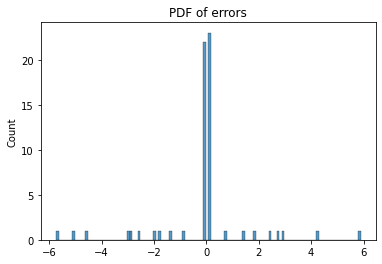


 ========== Test Errors ========== 

MSE on test data => 49.52578241043394
R-squared on test data => 0.7895491483354636


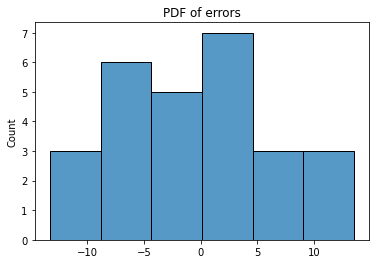

In [101]:
test_errors = showErrors(svr_model_linear, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

### Random Forest Regressor

In [105]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_bow):
        # split input data
        X_train, X_cv = X_train_bow[train_index], X_train_bow[cv_index]
        # split output data
        y_train, y_cv = y_train_bow[train_index], y_train_bow[cv_index]
        # create Random Forest Regressor
        model = RandomForestRegressor(n_estimators = space['n_estimators'], 
                                      min_samples_split = space['min_samples_split'], 
                                      max_depth = space['max_depth'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [106]:
# search space for hyper parameter tuning
space = {
    "n_estimators": hp.choice("n_estimators", [50, 70, 100, 150]),
    "min_samples_split": hp.choice("min_samples_split", [2, 3, 5]),
    "max_depth": hp.choice("max_depth", [10, 15, 20])
}

In [109]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|████████| 300/300 [01:16<00:00,  3.92trial/s, best loss: 163.4638490864683]


In [110]:
print("Best Param : ", best_param)

Best Param :  {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 0}


In [111]:
rf_model = RandomForestRegressor(n_estimators = 50, min_samples_split = 5, max_depth = 15)

In [112]:
rf_model.fit(X_train_bow, y_train_bow)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=50)


 ========== Train Errors ========== 

MSE on train data => 27.042129756126
R-squared on train data => 0.8968710308521537


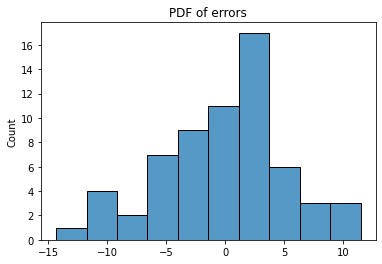


 ========== Test Errors ========== 

MSE on test data => 125.08201545559932
R-squared on test data => 0.468486606382178


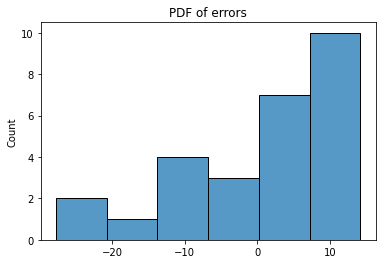

In [113]:
test_errors = showErrors(rf_model, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

### XGBoost Regressor

In [114]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_bow):
        # split input data
        X_train, X_cv = X_train_bow[train_index], X_train_bow[cv_index]
        # split output data
        y_train, y_cv = y_train_bow[train_index], y_train_bow[cv_index]
        # XGBoost Regressor
        model = xgb.XGBRegressor(
                    objective = "reg:squarederror",
                    booster = "gbtree",
                    tree_method = "hist",
                    grow_policy = "lossguide",
                    subsample = .9,
                    colsample_bytree = .8,
                    n_estimators = space['n_estimators'], 
                    max_depth = space['max_depth'],
                    learning_rate = space['learning_rate'],
                    reg_lambda = space['reg_lambda'],
                )
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [ ]:
# search space for hyper parameter tuning
space = {
    'n_estimators' : hp.choice('n_estimators', [50, 70, 100, 150]),
    'max_depth' : hp.choice('max_depth', [2, 3, 5, 7]),
    "learning_rate": hp.quniform("learning_rate", 0.01, 1, 0.01),
    "reg_lambda": hp.quniform("reg_lambda", 0.001, 1000, 0.001)
}

In [116]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:37<00:00,  7.93trial/s, best loss: 136.94184965500452]


In [117]:
print("Best Param : ", best_param)

Best Param :  {'learning_rate': 0.7000000000000001, 'max_depth': 0, 'n_estimators': 3, 'reg_lambda': 38.924}


In [118]:
xgb_model = xgb.XGBRegressor(
                    objective = "reg:squarederror",
                    booster = "gbtree",
                    tree_method = "hist",
                    grow_policy = "lossguide",
                    subsample = .8,
                    colsample_bytree = .5,
                    n_estimators = 150, 
                    max_depth = 2,
                    learning_rate = 0.7,
                    reg_lambda = 38.924
                )

In [119]:
xgb_model.fit(X_train_bow, y_train_bow)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.7, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0,
             reg_lambda=38.924, scale_pos_weight=1, subsample=0.8,
             tree_method='hist', validate_parameters=1, verbosity=None)


 ========== Train Errors ========== 

MSE on train data => 3.2299128168696014
R-squared on train data => 0.9876822727261073


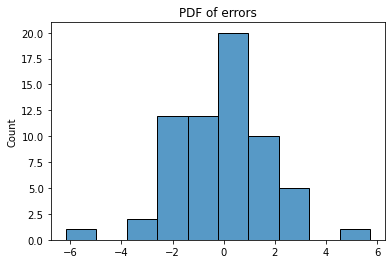


 ========== Test Errors ========== 

MSE on test data => 133.65954221642866
R-squared on test data => 0.4320379583420092


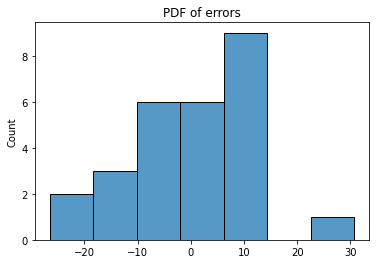

In [120]:
test_errors = showErrors(xgb_model, X_train_bow, y_train_bow, X_test_bow, y_test_bow)

<br><b style="color:#ff6600"><u>Summary</u></b><br>
Now again I have done hyper-param tuning for L2 Linear Regerssion. 
<ul>
<li> The best alpha is 1.659. </li>
<li> The train mse and r-squared are 1.9844 and 0.9924 respectively. </li>
<li> The test mse and r-squared are 52.1386 and 0.7784 respectively. </li>
</ul>
For KNN Regerssion,
<ul>
<li> The best params are n_neighbors=7 and metric='cosine' </li>
<li> The train mse and r-squared are 130.7427 and 0.5014 respectively. </li>
<li> The test mse and r-squared are 113.766 and 0.5166 respectively. </li>
</ul>
For Decision Tree Regressor,
<ul>
<li> The best params are max_depth=5, min_samples_split=2 </li>
<li> The train mse and r-squared are 21.9602 and 0.9163 respectively. </li>
<li> The test mse and r-squared are 164.5762 and 0.3006 respectively. </li>
</ul>
For Support Vector Regression (RBF Kernel),
<ul>
<li> The best param is C = 253.341 </li>
<li> The train mse and r-squared are 0.01 and 1 respectively. </li>
<li> The test mse and r-squared are 90.842 and 0.614 respectively. </li>
</ul>
For Support Vector Regression (Linear Kernel),
<ul>
<li> The best param is C = 1.429 </li>
<li> The train mse and r-squared are 3.0771 and 0.9883 respectively. </li>
<li> The test mse and r-squared are 49.5258 and 0.7895 respectively. </li>
</ul>
For Random Forest Regressor,
<ul><li> The best params are n_estimators = 50, min_samples_split = 5, max_depth = 15 </li>
<li> The train mse and r-squared are 27.0421 and 0.8969 respectively. </li>
<li> The test mse and r-squared are 125.082 and 0.4685 respectively. </li>
</ul>
For XGBoost Regressor,
<ul><li> The best params are n_estimators = 150, max_depth = 2,learning_rate = 0.7, reg_lambda = 38.924 </li>
<li> The train mse and r-squared are 3.2299 and 0.9877 respectively. </li>
<li> The test mse and r-squared are 133.6595 and 0.432 respectively. </li>
</ul>
<b>Here we can see that the best model is Linear kernel based SVR followed by the Linear regression with l2 regularizer.</b>

# Models with AverageW2V features

In [29]:
csvData = pd.read_csv('dataset/data.csv')

In [30]:
# load data_feature
data_feature = pd.read_csv('data_feature2.csv')

In [31]:
# verify data
data_feature.head(2)

,job_description,processed_resume,match_percentage,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio_min,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college,cosine_similarity,euclidean_distance
0,machine learning engineering 13585abc knowledg...,liam andrew fresher executive work experience ...,13.60,87,192,13,0.180556,86,45,52,50,1,1,0.896201,0.430370
1,machine learning engineering 13585abc knowledg...,ellie mackey fresher intern executive profile ...,36.63,84,180,27,0.364865,86,47,57,52,1,0,0.900257,0.417824


In [32]:
# load w2v_resume
with open('w2v_resume.npy', 'rb') as f:
    w2v_resume = np.load(f, allow_pickle=True)

In [33]:
# load w2v_jd
with open('w2v_jd.npy', 'rb') as f:
    w2v_jd = np.load(f, allow_pickle=True)

In [34]:
# create output variable
y_w2v = data_feature.match_percentage

In [35]:
# create input variables from extracted features
X_w2v_1 = data_feature.drop(columns=['job_description', 'processed_resume', 'match_percentage'])

In [36]:
X_w2v_1.head(3)

,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio_min,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college,cosine_similarity,euclidean_distance
0,87,192,13,0.180556,86,45,52,50,1,1,0.896201,0.430370
1,84,180,27,0.364865,86,47,57,52,1,0,0.900257,0.417824
2,93,184,18,0.260870,86,45,50,49,1,0,0.890447,0.443868


In [37]:
# create input variables from bow of job description
X_w2v_2 = pd.DataFrame(w2v_jd, columns=['w2v_jd_'+str(i) for i in range(1, w2v_jd.shape[1]+1)])

In [38]:
X_w2v_2.head(3)

,w2v_jd_1,w2v_jd_2,w2v_jd_3,w2v_jd_4,w2v_jd_5,w2v_jd_6,w2v_jd_7,w2v_jd_8,w2v_jd_9,w2v_jd_10,...,w2v_jd_291,w2v_jd_292,w2v_jd_293,w2v_jd_294,w2v_jd_295,w2v_jd_296,w2v_jd_297,w2v_jd_298,w2v_jd_299,w2v_jd_300
0,0.006335,0.015374,0.018297,0.079522,-0.043794,0.038008,0.057309,-0.096545,0.061698,0.032799,...,-0.123924,0.051403,-0.083477,0.014774,-0.022493,0.004105,0.037251,-0.031369,-0.014646,0.023314
1,0.006335,0.015374,0.018297,0.079522,-0.043794,0.038008,0.057309,-0.096545,0.061698,0.032799,...,-0.123924,0.051403,-0.083477,0.014774,-0.022493,0.004105,0.037251,-0.031369,-0.014646,0.023314
2,0.006335,0.015374,0.018297,0.079522,-0.043794,0.038008,0.057309,-0.096545,0.061698,0.032799,...,-0.123924,0.051403,-0.083477,0.014774,-0.022493,0.004105,0.037251,-0.031369,-0.014646,0.023314


In [39]:
# create input variables from bow of resumes
X_w2v_3 = pd.DataFrame(w2v_resume, columns=['w2v_resume_'+str(i) for i in range(1, w2v_resume.shape[1]+1)])

In [40]:
X_w2v_3.head(3)

,w2v_resume_1,w2v_resume_2,w2v_resume_3,w2v_resume_4,w2v_resume_5,w2v_resume_6,w2v_resume_7,w2v_resume_8,w2v_resume_9,w2v_resume_10,...,w2v_resume_291,w2v_resume_292,w2v_resume_293,w2v_resume_294,w2v_resume_295,w2v_resume_296,w2v_resume_297,w2v_resume_298,w2v_resume_299,w2v_resume_300
0,0.006755,-0.012968,0.000473,0.071339,-0.044992,0.038680,0.015418,-0.091917,0.044148,0.022059,...,-0.093632,0.078467,-0.082520,0.043662,-0.071912,-0.024356,0.025531,-0.037547,-0.004469,0.020108
1,0.013918,0.009207,-0.007583,0.055042,-0.037466,0.039507,0.052094,-0.067925,0.014280,0.003542,...,-0.123900,0.046592,-0.104040,-0.003736,-0.028183,-0.040095,0.053966,-0.031487,-0.012002,0.038397
2,-0.036020,0.019367,0.021208,0.048960,-0.024904,0.051158,0.046907,-0.063099,0.029806,-0.010489,...,-0.113115,0.018916,-0.068564,0.032169,-0.051364,-0.022383,0.029400,-0.058286,0.013220,0.029417


In [41]:
# concat all three to create the original input
X_w2v = pd.concat([X_w2v_1, X_w2v_2, X_w2v_3], axis=1)

In [42]:
print(X_w2v.shape)

(90, 612)


In [43]:
X_w2v.head(3)

,resume_word_num,total_unique_word_num,common_word_num,common_word_ratio_min,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,is_fresher,from_reputed_college,...,w2v_resume_291,w2v_resume_292,w2v_resume_293,w2v_resume_294,w2v_resume_295,w2v_resume_296,w2v_resume_297,w2v_resume_298,w2v_resume_299,w2v_resume_300
0,87,192,13,0.180556,86,45,52,50,1,1,...,-0.093632,0.078467,-0.082520,0.043662,-0.071912,-0.024356,0.025531,-0.037547,-0.004469,0.020108
1,84,180,27,0.364865,86,47,57,52,1,0,...,-0.123900,0.046592,-0.104040,-0.003736,-0.028183,-0.040095,0.053966,-0.031487,-0.012002,0.038397
2,93,184,18,0.260870,86,45,50,49,1,0,...,-0.113115,0.018916,-0.068564,0.032169,-0.051364,-0.022383,0.029400,-0.058286,0.013220,0.029417


<br><b style="color:#ff6600"><u>Summary</u></b><br>
* I have created the input and output data by combining extracted features and average word2vec representations of resumes and job descriptions.
* We have 90 data points.
* We have 612 features.

## Train Test split

In [44]:
y_w2v = y_w2v.to_numpy()
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y_w2v, test_size=0.30, random_state=1)

In [19]:
# get train and test indices
train_indices = X_train_w2v.index
test_indices = X_test_w2v.index

<br><b style="color:#ff6600"><u>Summary</u></b><br>
Again we have done train test split just like before. Since we have used the same random state. The data points will be same as before in train and test splits.

## Preprocessing

In [21]:
# mean centering, variance scaling
scaler = StandardScaler()

In [22]:
# getting mean and variance
scaler.fit(X_train_w2v)

StandardScaler()

In [23]:
# standardizing train data
X_train_w2v = scaler.transform(X_train_w2v)

In [24]:
# standardizing test data
X_test_w2v = scaler.transform(X_test_w2v)

<br><b style="color:#ff6600"><u>Summary</u></b><br>
Again I have done column standardization with mean centering and variance scaling.

## Modeling (Basic)

### Linear Regression

In [25]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create Linear Regression model with l2 regularizer
        model = Ridge(alpha = space['alpha'], max_iter=3000)
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [26]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "alpha": hp.quniform("alpha", 0.001, 1000, 0.001)
}

In [27]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:12<00:00, 24.38trial/s, best loss: 159.04115884772614]


In [28]:
print("Best Param : ", best_param)

Best Param :  {'alpha': 88.674}


In [29]:
# create l2 linear regerssion model
lr_model_t = Ridge(alpha = 88.674, max_iter=3000)
# fit model on train data
lr_model_t.fit(X_train_w2v, y_train_w2v)

Ridge(alpha=88.674, max_iter=3000)


 ========== Train Errors ========== 

MSE on train data => 17.155410058768833
R-squared on train data => 0.9345754283917438


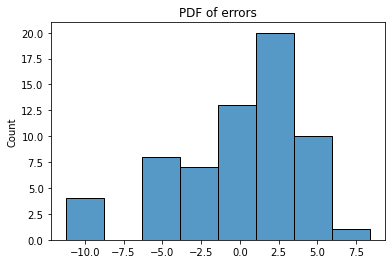


 ========== Test Errors ========== 

MSE on test data => 111.87132188386224
R-squared on test data => 0.5246230585074767


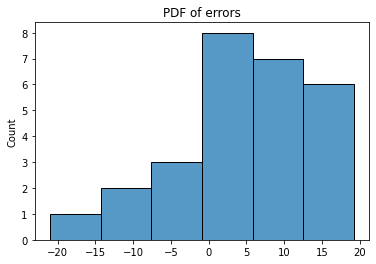

In [32]:
test_errors = showErrors(lr_model_t, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

### KNN Regression

In [33]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create KNeighborsRegressor
        model = KNeighborsRegressor(n_neighbors=space['n_neighbors'], metric=space['metric'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [34]:
# search space for hyper parameter tuning
space = {
    "n_neighbors": hp.choice("n_neighbors", [3, 5, 7]),
    "metric": hp.choice("metric", ['euclidean', 'cosine'])
}

In [36]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:05<00:00, 59.49trial/s, best loss: 237.48912037576932]


In [37]:
print(best_param)

{'metric': 1, 'n_neighbors': 2}


In [38]:
knn_model = KNeighborsRegressor(n_neighbors=7, metric='cosine')

In [39]:
knn_model.fit(X_train_w2v, y_train_w2v)

KNeighborsRegressor(metric='cosine', n_neighbors=7)


 ========== Train Errors ========== 

MSE on train data => 155.1368555879494
R-squared on train data => 0.408363759145148


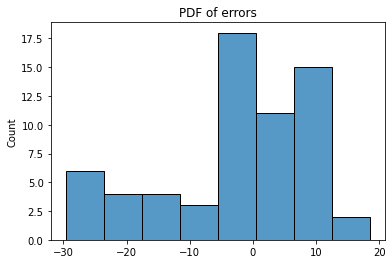


 ========== Test Errors ========== 

MSE on test data => 100.86156780045354
R-squared on test data => 0.5714070164926074


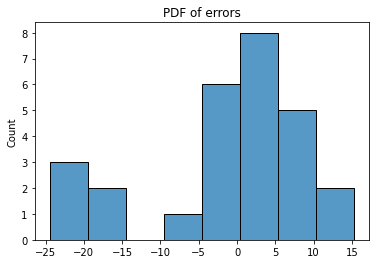

In [40]:
test_errors = showErrors(knn_model, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

<br><b style="color:#ff6600"><u>Summary</u></b><br>
I have used Linear Regression with l2 regularizer and KNN Regression for initial ananlysis.
<br>
After hyper parameter tuning for Linear Regression, I found the best alpha=88.674.<br>
And train and test mse are 17.155 and 111.87 respectively.
<br><br>
For KNN Regression the best hyper parameters are n_neighbors=7 and metric='cosine.<br>
And train and test mse are 155.137 and 100.862 respectively.
<br><br>
We can see the results are not very promising. 

## Error Analysis

In [313]:
# feature_selector = Ridge(alpha = 88.197, max_iter=3000)
# sfs = SequentialFeatureSelector(feature_selector, n_features_to_select=200, direction='forward', cv=3)
# sfs.fit(StandardScaler().fit_transform(X_w2v), y_w2v)

SequentialFeatureSelector(cv=3, estimator=Ridge(alpha=88.197, max_iter=3000),
                          n_features_to_select=200)

In [319]:
#features = X_w2v.columns[sfs.get_support()]

In [320]:
# # save selected_features
# with open('selected_features2.npy', 'wb') as f:
#     np.save(f, features, allow_pickle=True)

In [45]:
# load selected_features
with open('selected_features2.npy', 'rb') as f:
    features = np.load(f, allow_pickle=True)

In [46]:
X_w2v = X_w2v[features]

<br><b style="color:#ff6600"><u>Summary</u></b><br>
From the previous exprecience and from the fact that we have only one jd, I had a hunch that we can get better results after doing forward feature selection.<br><br>
I used the linear regression for forward feature selection and selected 200 features out of 613 features.

## Train Test split

In [47]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y_w2v, test_size=0.30, random_state=1)

In [48]:
# get train and test indices
train_indices = X_train_w2v.index
test_indices = X_test_w2v.index

<br><b style="color:#ff6600"><u>Summary</u></b><br>
Just like before we have done train test split.

## Preprocessing

In [49]:
# mean centering, variance scaling
scaler = StandardScaler()

In [50]:
# getting mean and variance
scaler.fit(X_train_w2v)

StandardScaler()

In [51]:
# standardizing train data
X_train_w2v = scaler.transform(X_train_w2v)

In [52]:
# standardizing test data
X_test_w2v = scaler.transform(X_test_w2v)

In [53]:
# # save all the data
# with open('X_train_w2v.npy', 'wb') as f:
#     np.save(f, X_train_w2v, allow_pickle=True)
# with open('X_test_w2v.npy', 'wb') as f:
#     np.save(f, X_test_w2v, allow_pickle=True)
# with open('y_train_w2v.npy', 'wb') as f:
#     np.save(f, y_train_w2v, allow_pickle=True)
# with open('y_test_w2v.npy', 'wb') as f:
#     np.save(f, y_test_w2v, allow_pickle=True)

<br><b style="color:#ff6600"><u>Summary</u></b><br>
Again we have preprocessed the data to have mean of 0 and variance of 1. And save them in file.

## Modeling

### Linear Regression

In [51]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create Linear Regression model with l2 regularizer
        model = Ridge(alpha = space['alpha'], max_iter=3000)
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [52]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "alpha": hp.quniform("alpha", 0.001, 1000, 0.001)
}

In [53]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|████████| 300/300 [00:08<00:00, 35.40trial/s, best loss: 69.81675289805044]


In [54]:
print("Best Param : ", best_param)

Best Param :  {'alpha': 8.287}


In [127]:
# create l2 linear regerssion model
lr_model_2 = Ridge(alpha = 8.287, max_iter=3000)
# fit model on train data
lr_model_2.fit(X_train_w2v, y_train_w2v)

Ridge(alpha=8.287, max_iter=3000)


 ========== Train Errors ========== 

MSE on train data => 4.4046196942558
R-squared on train data => 0.9832023626595461


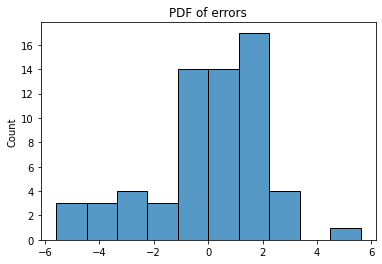


 ========== Test Errors ========== 

MSE on test data => 59.500106890237085
R-squared on test data => 0.7471650611108108


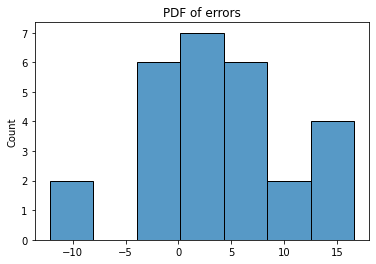

In [56]:
test_errors = showErrors(lr_model_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

### KNN Regression

In [57]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create Linear Regression model with l2 regularizer
        model = KNeighborsRegressor(n_neighbors=space['n_neighbors'], metric=space['metric'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [58]:
# search space for hyper parameter tuning
space = {
    "n_neighbors": hp.choice("n_neighbors", [3, 5, 7]),
    "metric": hp.choice("metric", ['euclidean', 'cosine'])
}

In [59]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|██████| 300/300 [00:01<00:00, 199.70trial/s, best loss: 187.48430638160025]


In [60]:
print(best_param)

{'metric': 1, 'n_neighbors': 2}


In [61]:
knn_model_2 = KNeighborsRegressor(n_neighbors=7, metric='cosine')

In [62]:
knn_model_2.fit(X_train_w2v, y_train_w2v)

KNeighborsRegressor(metric='cosine', n_neighbors=7)


 ========== Train Errors ========== 

MSE on train data => 105.31223598963398
R-squared on train data => 0.5983769609046665


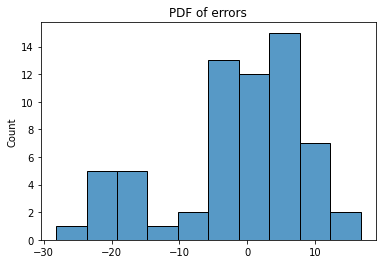


 ========== Test Errors ========== 

MSE on test data => 83.38489425547998
R-squared on test data => 0.6456709786713835


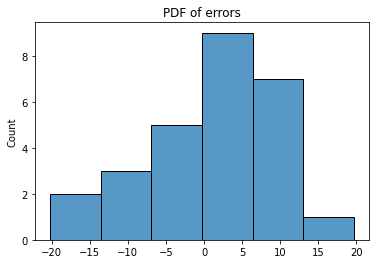

In [63]:
test_errors = showErrors(knn_model_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

### Decision Tree Regressor

In [64]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create DecisionTreeRegressor
        model = DecisionTreeRegressor(max_depth=space['max_depth'], min_samples_split=space['min_samples_split'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [68]:
# search space for hyper parameter tuning
space = {
    "max_depth": hp.choice("max_depth", [5, 7, 10, 15, 20, None]),
    "min_samples_split": hp.choice("min_samples_split", [2, 3, 5, 7])
}

In [71]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:01<00:00, 158.19trial/s, best loss: 196.2500785714286]


In [72]:
best_param

{'max_depth': 2, 'min_samples_split': 2}

In [73]:
dt_model_2 = DecisionTreeRegressor(max_depth=10, min_samples_split=5)

In [74]:
dt_model_2.fit(X_train_w2v, y_train_w2v)

DecisionTreeRegressor(max_depth=10, min_samples_split=5)


 ========== Train Errors ========== 

MSE on train data => 2.467142195767195
R-squared on train data => 0.9905912058818893


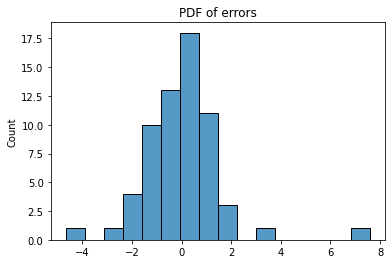


 ========== Test Errors ========== 

MSE on test data => 389.3863184156379
R-squared on test data => -0.6546267085287898


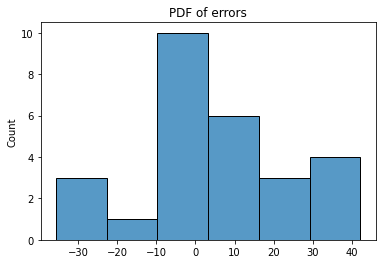

In [75]:
test_errors = showErrors(dt_model_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

### Support Vector Regression (RBF Kernel)

In [76]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create SVR RBF
        model = SVR(C = space['c'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [77]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "c": hp.quniform("c", 0.001, 1000, 0.001)
}

In [95]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:02<00:00, 127.68trial/s, best loss: 86.75737114500494]


In [96]:
print("Best Param : ", best_param)

Best Param :  {'c': 399.718}


In [125]:
svr_model_rbf_2 = SVR(C = 399.718)

In [126]:
svr_model_rbf_2.fit(X_train_w2v, y_train_w2v)

SVR(C=399.718)


 ========== Train Errors ========== 

MSE on train data => 0.010016108705929871
R-squared on train data => 0.9999618021592592


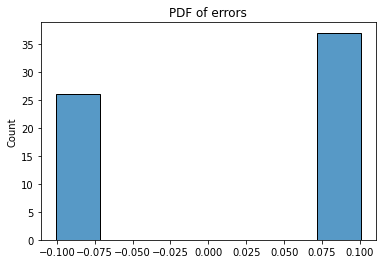


 ========== Test Errors ========== 

MSE on test data => 53.84727230466907
R-squared on test data => 0.7711857589161


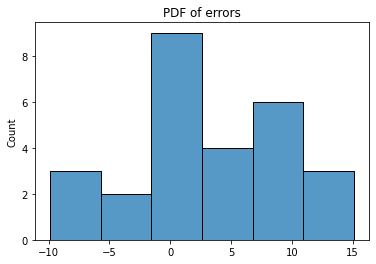

In [99]:
test_errors = showErrors(svr_model_rbf_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

### Support Vector Regression (Linear Kernel)

In [100]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create SVR Linear
        model = SVR(kernel = 'linear', C = space['c'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [101]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "c": hp.quniform("c", 0.001, 1000, 0.001)
}

In [113]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:02<00:00, 111.46trial/s, best loss: 79.85641518783567]


In [114]:
print("Best Param : ", best_param)

Best Param :  {'c': 385.101}


In [115]:
svr_model_linear_2 = SVR(kernel = 'linear', C = 385.101)

In [116]:
svr_model_linear_2.fit(X_train_w2v, y_train_w2v)

SVR(C=385.101, kernel='linear')


 ========== Train Errors ========== 

MSE on train data => 0.010019179585428466
R-squared on train data => 0.9999617904480279


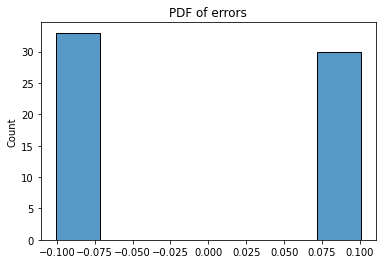


 ========== Test Errors ========== 

MSE on test data => 109.32267988255897
R-squared on test data => 0.5354530515667945


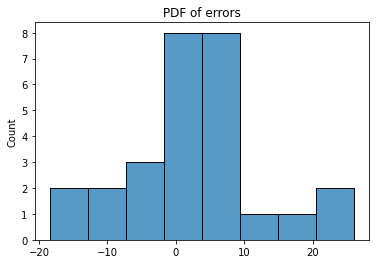

In [117]:
test_errors = showErrors(svr_model_linear_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

### Random Forest Regressor

In [118]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create RandomForestRegressor
        model = RandomForestRegressor(n_estimators = space['n_estimators'], 
                                      min_samples_split = space['min_samples_split'], 
                                      max_depth = space['max_depth'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [119]:
# search space for hyper parameter tuning
space = {
    "n_estimators": hp.choice("n_estimators", [50, 70, 100, 150]),
    "min_samples_split": hp.choice("min_samples_split", [2, 3, 5]),
    "max_depth": hp.choice("max_depth", [10, 15, 20])
}

In [120]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [01:38<00:00,  3.03trial/s, best loss: 147.53673871752096]


In [121]:
print("Best Param : ", best_param)

Best Param :  {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 0}


In [122]:
rf_model_2 = RandomForestRegressor(n_estimators = 50, min_samples_split = 5, max_depth = 20)

In [123]:
rf_model_2.fit(X_train_w2v, y_train_w2v)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=50)


 ========== Train Errors ========== 

MSE on train data => 26.476714642231244
R-squared on train data => 0.8990273209950692


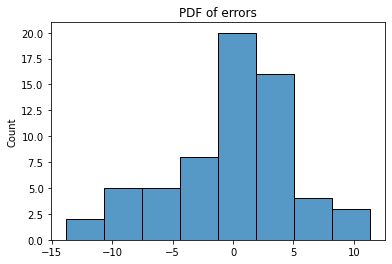


 ========== Test Errors ========== 

MSE on test data => 113.13200407589028
R-squared on test data => 0.5192660176273972


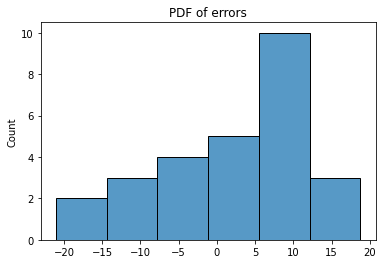

In [124]:
test_errors = showErrors(rf_model_2, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

### XGBoost Regressor

In [125]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_train_w2v):
        # split input data
        X_train, X_cv = X_train_w2v[train_index], X_train_w2v[cv_index]
        # split output data
        y_train, y_cv = y_train_w2v[train_index], y_train_w2v[cv_index]
        # create XGBoost Regressor
        model = xgb.XGBRegressor(
                    objective = "reg:squarederror",
                    # eval_metric = "mse",
                    booster = "gbtree",
                    tree_method = "hist",
                    grow_policy = "lossguide",
                    subsample = .8,
                    colsample_bytree = .5,
                    n_estimators = space['n_estimators'], 
                    max_depth = space['max_depth'],
                    learning_rate = space['learning_rate'],
                    reg_lambda = space['reg_lambda'],
                )
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [126]:
# search space for hyper parameter tuning
space = {
    'n_estimators' : hp.choice('n_estimators', [50, 70, 100, 150]),
    'max_depth' : hp.choice('max_depth', [2, 3, 5, 7]),
    "learning_rate": hp.quniform("learning_rate", 0.01, 1, 0.01),
    "reg_lambda": hp.quniform("reg_lambda", 0.001, 1000, 0.001)
}

In [127]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [01:08<00:00,  4.36trial/s, best loss: 164.24896933089926]


In [128]:
print("Best Param : ", best_param)

Best Param :  {'learning_rate': 0.04, 'max_depth': 0, 'n_estimators': 2, 'reg_lambda': 0.22}


In [129]:
xgb_model = xgb.XGBRegressor(
                    objective = "reg:squarederror",
                    booster = "gbtree",
                    tree_method = "hist",
                    grow_policy = "lossguide",
                    subsample = .8,
                    colsample_bytree = .5,
                    n_estimators = 100, 
                    max_depth = 2,
                    learning_rate = 0.04,
                    reg_lambda = 0.22
                )

In [130]:
xgb_model.fit(X_train_w2v, y_train_w2v)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.04, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=0.22,
             scale_pos_weight=1, subsample=0.8, tree_method='hist',
             validate_parameters=1, verbosity=None)


 ========== Train Errors ========== 

MSE on train data => 9.347684281530256
R-squared on train data => 0.9643512899106862


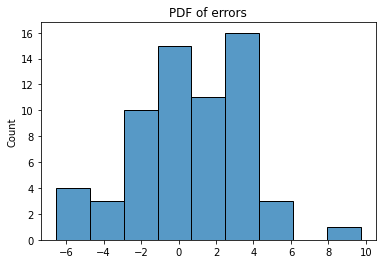


 ========== Test Errors ========== 

MSE on test data => 109.52429491726474
R-squared on test data => 0.5345963249549748


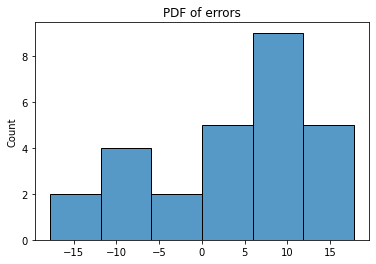

In [131]:
test_errors = showErrors(xgb_model, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)

<br><b style="color:#ff6600"><u>Summary</u></b><br>
For L2 Linear Regerssion. 
<ul>
<li> The best alpha is 8.287. </li>
<li> The train mse and r-squared are 4.4046 and 0.9832 respectively. </li>
<li> The test mse and r-squared are 59.5001 and 0.7472 respectively. </li>
</ul>
For KNN Regerssion,
<ul>
<li> The best params are n_neighbors=7, metric='cosine' </li>
<li> The train mse and r-squared are 105.3122 and 0.5984 respectively. </li>
<li> The test mse and r-squared are 83.3849 and 0.6457 respectively. </li>
</ul>
For Decision Tree Regressor,
<ul>
<li> The best params are max_depth=10, min_samples_split=5 </li>
<li> The train mse and r-squared are 2.4671 and 0.9906 respectively. </li>
<li> The test mse and r-squared are 389.3863 and -0.6546 respectively. </li>
</ul>
For Support Vector Regression (RBF Kernel),
<ul>
<li> The best param is C = 399.718 </li>
<li> The train mse and r-squared are 0.01 and 1 respectively. </li>
<li> The test mse and r-squared are 53.8473 and 0.7712 respectively. </li>
</ul>
For Support Vector Regression (Linear Kernel),
<ul>
<li> The best param is C = 385.101 </li>
<li> The train mse and r-squared are 0.01 and 1 respectively. </li>
<li> The test mse and r-squared are 109.3227 and 0.5355 respectively. </li>
</ul>
For Random Forest Regressor,
<ul><li> The best params are n_estimators = 50, min_samples_split = 5, max_depth = 20 </li>
<li> The train mse and r-squared are 26.4767 and 0.899 respectively. </li>
<li> The test mse and r-squared are 113.132 and 0.5193 respectively. </li>
</ul>
For XGBoost Regressor,
<ul><li> The best params are n_estimators = 100, max_depth = 2,learning_rate = 0.04, reg_lambda = 0.22 </li>
<li> The train mse and r-squared are 9.3477 and 0.9644 respectively. </li>
<li> The test mse and r-squared are 109.5243 and 0.5346 respectively. </li>
</ul>
The RBF kernel based SVR have the lowest mse for test data. But when we compare train and test mse for it then it is clear that the model is overfitting a lot.
<br>
<b>The Linear regression will be the best choice among these models. Since it has lower mse and also it is not overfitting that much.</b>

# Performances

In [153]:
bowModelsTable = PrettyTable(["Model", "MSE", "R-squared"], align='l')
bowModelsTable.add_row(["Support Vector Regression (Linear Kernel)", "49.5258", "0.7895"])
bowModelsTable.add_row(["Linear Regression (L2 Regularizer)", "52.1386", "0.7784"])
bowModelsTable.add_row(["Support Vector Regression (RBF Kernel)", "90.842", "0.614"])
bowModelsTable.add_row(["KNN Regression", "113.766", "0.5166"])
bowModelsTable.add_row(["Random Forest Regressor", "125.082", "0.4685"])
bowModelsTable.add_row(["XGBoost Regressor", "133.6595", "0.432"])
bowModelsTable.add_row(["Decision Tree Regressor", "164.5762", "0.3006"])
print('Performance of models based on BoW features')
print(bowModelsTable)

Performance of models based on BoW features
+-------------------------------------------+----------+-----------+
| Model                                     | MSE      | R-squared |
+-------------------------------------------+----------+-----------+
| Support Vector Regression (Linear Kernel) | 49.5258  | 0.7895    |
| Linear Regression (L2 Regularizer)        | 52.1386  | 0.7784    |
| Support Vector Regression (RBF Kernel)    | 90.842   | 0.614     |
| KNN Regression                            | 113.766  | 0.5166    |
| Random Forest Regressor                   | 125.082  | 0.4685    |
| XGBoost Regressor                         | 133.6595 | 0.432     |
| Decision Tree Regressor                   | 164.5762 | 0.3006    |
+-------------------------------------------+----------+-----------+


In [154]:
w2vModelsTable = PrettyTable(["Model", "MSE", "R-squared"], align='l')
w2vModelsTable.add_row(["Support Vector Regression (RBF Kernel)", "53.8473", "0.7712"])
w2vModelsTable.add_row(["Linear Regression (L2 Regularizer)", "59.5001", "0.7472"])
w2vModelsTable.add_row(["KNN Regression", "83.3849", "0.6457"])
w2vModelsTable.add_row(["Support Vector Regression (Linear Kernel)", "109.3227", "0.5355"])
w2vModelsTable.add_row(["XGBoost Regressor", "109.524", "0.5346"])
w2vModelsTable.add_row(["Random Forest Regressor", "113.132", "0.5193"])
w2vModelsTable.add_row(["Decision Tree Regressor", "389.3863", "-0.6546"])
print('Performance of models based on average word2vec features')
print(w2vModelsTable)

Performance of models based on average word2vec features
+-------------------------------------------+----------+-----------+
| Model                                     | MSE      | R-squared |
+-------------------------------------------+----------+-----------+
| Support Vector Regression (RBF Kernel)    | 53.8473  | 0.7712    |
| Linear Regression (L2 Regularizer)        | 59.5001  | 0.7472    |
| KNN Regression                            | 83.3849  | 0.6457    |
| Support Vector Regression (Linear Kernel) | 109.3227 | 0.5355    |
| XGBoost Regressor                         | 109.524  | 0.5346    |
| Random Forest Regressor                   | 113.132  | 0.5193    |
| Decision Tree Regressor                   | 389.3863 | -0.6546   |
+-------------------------------------------+----------+-----------+


In [70]:
# #save the best model
# dump(svr_model_linear, 'svr_model_linear.joblib')

['svr_model_linear.joblib']

In [155]:
# #save the best model
# dump(lr_model_2, 'lr_model_2.joblib')

['lr_model_2.joblib']

<br><b style="color:#ff6600"><u>Summary</u></b><br>
Here I have displayed the mse and r-squared error for test data.<br>
And from above stats it is clear that the Support Vector Regression (Linear Kernel) model based on BoW feature is performing the best.<br>
The top 3 models based on MSE on test data are,
* Support Vector Regression (Linear Kernel) model based on BoW feature
* Linear Regression (L2 Regularizer) model based on BoW feature
* Support Vector Regression (RBF Kernel) model based on Average Word2Vec feature

The worst performing models are Decision Tree Regressor models.

# Stacking Ensemble (stack of best models)

In [58]:
X_ensemble_train = pd.DataFrame({'svr_linear_bow':svr_model_linear.predict(X_train_bow), 
                                'linear_reg_w2v':lr_model_2.predict(X_train_w2v)})

In [59]:
X_ensemble_test = pd.DataFrame({'svr_linear_bow':svr_model_linear.predict(X_test_bow), 
                                'linear_reg_w2v':lr_model_2.predict(X_test_w2v)})

In [60]:
y_ensemble_train = y_train_bow

In [61]:
y_ensemble_test = y_test_bow

In [62]:
X_ensemble_train

,svr_linear_bow,linear_reg_w2v
0,40.528492,47.252653
1,52.662565,52.413105
2,47.162234,47.273207
3,46.980086,44.976880
4,37.320154,37.965770
...,...,...
58,47.409660,47.340348
59,6.559540,6.057366
60,53.759593,53.784499
61,51.150213,51.902363


<br><b style="color:#ff6600"><u>Summary</u></b><br>
I was not much impressed with the result. So I though can we somehow combine best of both the features to create a better model.<br>
This reminded me of stacking type ensemble. So I chose following models for level-0 of stacking, 
* Support Vector Regression (Linear Kernel) model based on BoW features
* Linear Regression (L2 Regularized) model based on Word2Vec features

## Preprocessing

In [63]:
# mean centering, variance scaling
scaler = StandardScaler()

In [64]:
# getting mean and variance
scaler.fit(X_ensemble_train)

StandardScaler()

In [65]:
# standardizing train data
X_ensemble_train = scaler.transform(X_ensemble_train)

In [66]:
# standardizing test data
X_ensemble_test = scaler.transform(X_ensemble_test)

In [122]:
# # save all the data
# with open('X_train_ensemble.npy', 'wb') as f:
#     np.save(f, X_ensemble_train, allow_pickle=True)
# with open('X_test_ensemble.npy', 'wb') as f:
#     np.save(f, X_ensemble_test, allow_pickle=True)
# with open('y_train_ensemble.npy', 'wb') as f:
#     np.save(f, y_ensemble_train, allow_pickle=True)
# with open('y_test_ensemble.npy', 'wb') as f:
#     np.save(f, y_ensemble_test, allow_pickle=True)

<br><b style="color:#ff6600"><u>Summary</u></b><br>
I have done similar preprocessing as above. I have done mean centering and variance scaling.

## Finding the Meta model

### Linear Regression

In [67]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_ensemble_train):
        # split input data
        X_train, X_cv = X_ensemble_train[train_index], X_ensemble_train[cv_index]
        # split output data
        y_train, y_cv = y_ensemble_train[train_index], y_ensemble_train[cv_index]
        # create Linear Regression model with l2 regularizer
        model = Ridge(alpha = space['alpha'], max_iter=3000)
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [68]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "alpha": hp.quniform("alpha", 0.001, 1000, 0.001)
}

In [69]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:02<00:00, 142.73trial/s, best loss: 2.317218645632346]


In [70]:
print("Best Param : ", best_param)

Best Param :  {'alpha': 0.068}


In [71]:
# create l2 linear regerssion model
lr_model_meta = Ridge(alpha = 0.068, max_iter=3000)
# fit model on train data
lr_model_meta.fit(X_ensemble_train, y_ensemble_train)

Ridge(alpha=0.068, max_iter=3000)


 ========== Train Errors ========== 

MSE on train data => 2.1756917243545892
R-squared on train data => 0.9917026932885951


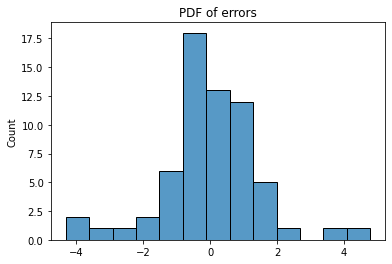


 ========== Test Errors ========== 

MSE on test data => 33.83411497884591
R-squared on test data => 0.85622804999616


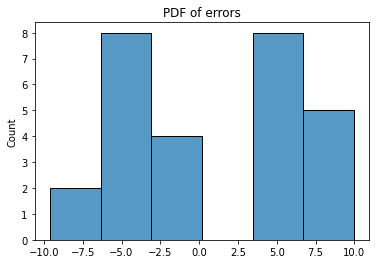

In [72]:
test_errors = showErrors(lr_model_meta, X_ensemble_train, y_ensemble_train, X_ensemble_test, y_ensemble_test)

### KNN Regression

In [73]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_ensemble_train):
        # split input data
        X_train, X_cv = X_ensemble_train[train_index], X_ensemble_train[cv_index]
        # split output data
        y_train, y_cv = y_ensemble_train[train_index], y_ensemble_train[cv_index]
        model = KNeighborsRegressor(n_neighbors=space['n_neighbors'], metric=space['metric'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [81]:
# search space for hyper parameter tuning
space = {
    "n_neighbors": hp.choice("n_neighbors", [2, 3, 5]),
    "metric": hp.choice("metric", ['euclidean', 'cosine'])
}

In [82]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

100%|███████| 100/100 [00:00<00:00, 244.53trial/s, best loss: 5.332197222222221]


In [83]:
print(best_param)

{'metric': 0, 'n_neighbors': 0}


In [145]:
knn_model_meta = KNeighborsRegressor(n_neighbors=2)

In [146]:
knn_model_meta.fit(X_ensemble_train, y_ensemble_train)

KNeighborsRegressor(n_neighbors=2)


 ========== Train Errors ========== 

MSE on train data => 1.5009432539682528
R-squared on train data => 0.9942759415797827


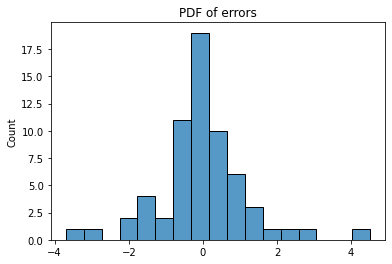


 ========== Test Errors ========== 

MSE on test data => 20.656555555555563
R-squared on test data => 0.9122237045525883


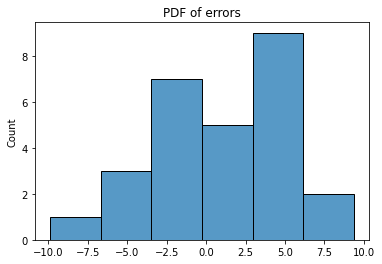

In [147]:
test_errors = showErrors(knn_model_meta, X_ensemble_train, y_ensemble_train, X_ensemble_test, y_ensemble_test)

In [150]:
#mean absolute error
print('Train MAE', mae(y_ensemble_train, knn_model_meta.predict(X_ensemble_train)))
print('Test MAE', mae(y_ensemble_test, knn_model_meta.predict(X_ensemble_test)))

Train MAE 0.82531746031746
Test MAE 3.74851851851852


### Support Vector Regression (RBF Kernel)

In [101]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_ensemble_train):
        # split input data
        X_train, X_cv = X_ensemble_train[train_index], X_ensemble_train[cv_index]
        # split output data
        y_train, y_cv = y_ensemble_train[train_index], y_ensemble_train[cv_index]
        # create SVR RBF
        model = SVR(C = space['c'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [102]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "c": hp.quniform("c", 0.001, 1000, 0.001)
}

In [103]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|██████| 300/300 [00:02<00:00, 101.60trial/s, best loss: 3.7650291032199377]


In [104]:
print("Best Param : ", best_param)

Best Param :  {'c': 271.031}


In [105]:
svr_model_rbf_meta = SVR(C = 271.031)

In [106]:
svr_model_rbf_meta.fit(X_ensemble_train, y_ensemble_train)

SVR(C=271.031)


 ========== Train Errors ========== 

MSE on train data => 2.0036855348250584
R-squared on train data => 0.9923586631095079


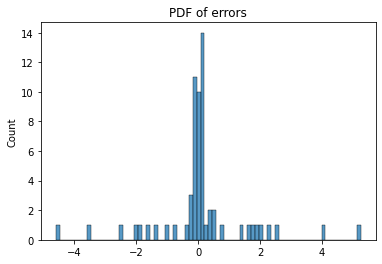


 ========== Test Errors ========== 

MSE on test data => 30.6848819728049
R-squared on test data => 0.8696101458653162


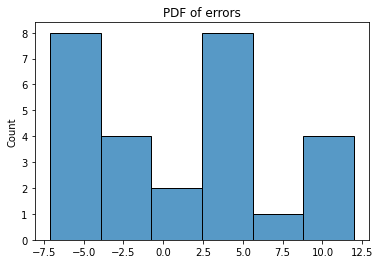

In [107]:
test_errors = showErrors(svr_model_rbf_meta, X_ensemble_train, y_ensemble_train, X_ensemble_test, y_ensemble_test)

### Support Vector Regression (Linear Kernel)

In [108]:
def objective(space):
    '''objective function for hyper param tuning'''
    # 3 fold cross validation
    kf = KFold(n_splits=3)
    mselosses = []
    # k fold cross validation
    for train_index, cv_index in kf.split(X_ensemble_train):
        # split input data
        X_train, X_cv = X_ensemble_train[train_index], X_ensemble_train[cv_index]
        # split output data
        y_train, y_cv = y_ensemble_train[train_index], y_ensemble_train[cv_index]
        # create SVR Linear
        model = SVR(kernel = 'linear', C = space['c'])
        # train the model
        model.fit(X_train, y_train)
        cv_pred = model.predict(X_cv)
        tempmseloss = mse(y_cv, cv_pred)
        mselosses.append(tempmseloss)
        
    # calculate mse
    mseloss = sum(mselosses)/len(mselosses)
    # return params
    return {'loss':mseloss, 'status': STATUS_OK, 'params': space }

In [109]:
# search space for hyper parameter tuning
space = {
    # uniform distribution between 0.001 and 1000
    "c": hp.quniform("c", 0.001, 1000, 0.001)
}

In [110]:
# create trials
trials = Trials()
# minimise the objective function with max 300 trials
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,
            trials=trials)

100%|███████| 300/300 [00:13<00:00, 22.65trial/s, best loss: 2.5005693676160834]


In [111]:
print("Best Param : ", best_param)

Best Param :  {'c': 8.179}


In [112]:
svr_model_linear_meta = SVR(kernel = 'linear', C = 8.179)

In [113]:
svr_model_linear_meta.fit(X_ensemble_train, y_ensemble_train)

SVR(C=8.179, kernel='linear')


 ========== Train Errors ========== 

MSE on train data => 2.6609698787533067
R-squared on train data => 0.9898520167233821


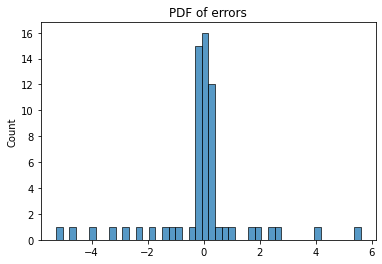


 ========== Test Errors ========== 

MSE on test data => 44.12593687715891
R-squared on test data => 0.8124948149362856


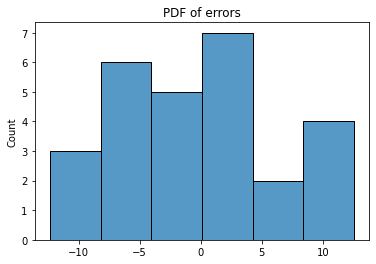

In [114]:
test_errors = showErrors(svr_model_linear_meta, X_ensemble_train, y_ensemble_train, X_ensemble_test, y_ensemble_test)

In [123]:
# #save the best model
# dump(knn_model_meta, 'knn_model_meta.joblib')

['knn_model_meta.joblib']

<br><b style="color:#ff6600"><u>Summary</u></b><br>
The stacking gave very good results. Here's what I found for stacking ensemble models.<br><br>
For L2 Linear Regerssion. 
<ul>
<li> The best alpha is 0.068. </li>
<li> The train mse and r-squared are 2.1757 and 0.9917 respectively. </li>
<li> The test mse and r-squared are 33.8341 and 0.8562 respectively. </li>
</ul>
For KNN Regerssion,
<ul>
<li> The best params are n_neighbors=2, metric='euclidean' </li>
<li> The train mse and r-squared are 1.5009 and 0.9943 respectively. </li>
<li> The test mse and r-squared are 20.6566 and 0.9122 respectively. </li>
</ul>
For Support Vector Regression (RBF Kernel),
<ul>
<li> The best param is C = 271.031 </li>
<li> The train mse and r-squared are 2.0037 and 0.9924 respectively. </li>
<li> The test mse and r-squared are 30.6849 and 0.8696 respectively. </li>
</ul>
For Support Vector Regression (Linear Kernel),
<ul>
<li> The best param is C = 8.179 </li>
<li> The train mse and r-squared are 2.661 and 0.9899 respectively. </li>
<li> The test mse and r-squared are 44.1259 and 0.8125 respectively. </li>
</ul>
<b>The KNN regressor seems to be performing the best as the meta model for the stacking regressor</b>

## Train and Test performance with the best model

In [151]:
performanceTable = PrettyTable(["Metric", "Train Error", "Test Error"], align='l')
performanceTable.add_row(["Mean Squared Error (MSE)", "1.5009", "20.6566"])
performanceTable.add_row(["Coefficient of determination (R-Squared)", "0.9943", "0.9122"])
performanceTable.add_row(["Mean Absolute Error (MAE)", "0.8253", "3.7485"])
print(performanceTable)

+------------------------------------------+-------------+------------+
| Metric                                   | Train Error | Test Error |
+------------------------------------------+-------------+------------+
| Mean Squared Error (MSE)                 | 1.5009      | 20.6566    |
| Coefficient of determination (R-Squared) | 0.9943      | 0.9122     |
| Mean Absolute Error (MAE)                | 0.8253      | 3.7485     |
+------------------------------------------+-------------+------------+


<br><b style="color:#ff6600"><u>Summary</u></b><br>
With our best model which is stacking ensemble model, where the base models or level-0 models are <b>Support Vector Regression (Linear Kernel) model based on BoW features</b> and <b>Linear Regression (L2 Regularized) model based on Word2Vec features</b> and the meta model or level-1 model is a <b>KNN Regressor</b>.<br>
We get following results,
* Train MSE is 1.5009 and Test MSE is 20.6566
* Train R-Squared is 0.9943 and Test R-Squared is 0.9122
* Train MAE is 0.8253 and Test MAE is 3.7485

Which seems very impressive.

# Further Analysis of the best model

In [128]:
def getKFeatures(k, model_coef, reverse=False):
    '''get top or bottom k number of important features for linear regression'''
    # get k features
    if reverse:
        top_k = np.argsort(np.abs(model_coef))[:k]
    else:
        top_k = np.argsort(np.abs(model_coef))[::-1][:k]
    top_k_features = list(features[top_k])
    # load bow vocab
    with open('bow_vocab.npy', 'rb') as f:
        bow_vocab = np.load(f, allow_pickle=True)
    values = np.array(model_coef[top_k], dtype=np.float16)
    labels = ['BoW: '+bow_vocab[int(i.replace('bow_resume_',''))-1] if i.startswith('bow_resume_') else i for i in top_k_features]
    for i in range(k):
        print(labels[i].ljust(35, '-'), '> ', values[i])

In [130]:
# load best models
svr_model_linear = load('svr_model_linear.joblib')
lr_model_2 = load('lr_model_2.joblib')
knn_model_meta = load('knn_model_meta.joblib')

In [131]:
# total weights
len(svr_model_linear.coef_[0])

100

In [132]:
# total non zero weights
(svr_model_linear.coef_[0]!=0).sum()

55

In [135]:
# get top 15 features
getKFeatures(15, svr_model_linear.coef_[0])

BoW: experienced------------------- >  -4.91
common_word_ratio_min-------------- >  4.695
BoW: logistic---------------------- >  -4.297
BoW: beng bachelor engineering----- >  -3.771
BoW: various----------------------- >  3.656
BoW: gathering--------------------- >  -3.467
fuzz_token_sort_ratio-------------- >  3.402
BoW: ai---------------------------- >  3.068
BoW: logistic regression----------- >  -2.926
BoW: tuning------------------------ >  -2.695
BoW: power bi---------------------- >  -2.576
BoW: panda matplotlib-------------- >  2.479
BoW: html-------------------------- >  -2.352
BoW: scientist--------------------- >  -2.164
BoW: data visualization------------ >  2.047


In [136]:
# get bottom 10 features
getKFeatures(10, svr_model_linear.coef_[0], reverse=True)

bow_jd_28-------------------------- >  0.0
bow_jd_22-------------------------- >  0.0
bow_jd_23-------------------------- >  0.0
bow_jd_24-------------------------- >  0.0
bow_jd_25-------------------------- >  0.0
bow_jd_26-------------------------- >  0.0
bow_jd_27-------------------------- >  0.0
bow_jd_43-------------------------- >  0.0
bow_jd_29-------------------------- >  0.0
bow_jd_30-------------------------- >  0.0


In [144]:
# total weights
len(lr_model_2.coef_)

200

In [142]:
# total non zero weights
(lr_model_2.coef_!=0).sum()

86

In [155]:
# predict for test data
y_test_pred = knn_model_meta.predict(X_ensemble_test)

In [156]:
# calculate errors
errors = y_ensemble_test - y_test_pred

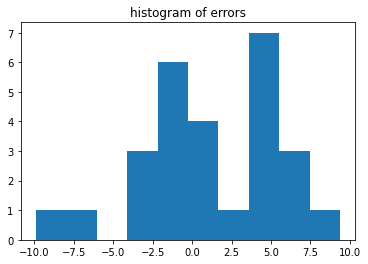

In [168]:
# show histogram of errors
plt.title('histogram of errors')
plt.hist(errors)
plt.show()

In [167]:
print(np.min(errors))
print(np.max(errors))

-9.910000000000004
9.390000000000008


[-1.6875  4.6275]


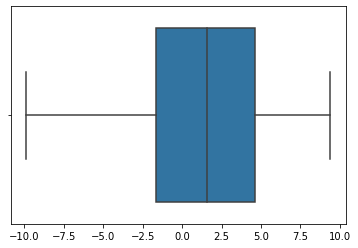

In [166]:
# get 25th and 75th percentile
print(np.percentile(errors, [25, 75]))
sns.boxplot(x=errors)
plt.show()

<br><b style="color:#ff6600"><u>Summary</u></b><br>
* The Support Vector Regression (Linear Kernel) model based on BoW features has 100 features out of which only 55 of them are non zero.
* The Linear Regression (L2 Regularized) model based on Word2Vec features has 200 features out of which only 86 of them are non zero.
* Stats on test errors are,
    * The minimum value is -9.91
    * The maximum value is 9.39
    * 75% of the errors are between -1.6875 and 4.6275